# Handout 3: Sam Holt

## Task 1

### (i) and (ii) - How is the code structured? What are the main loops?

1. Import libraries
2. Initialise parameters: number of students, fraction initially immune, chance of recovering per day, number of infected per day, number of days, number of repetitions and initialise arrays for infected, susceptible and removed.
3. Begin repetition loop.
4. Initial loops: create array P for all students, then assign 0's to amount that need to be initially immune, then randomly assign a Patient Zero.
5. Loop over days (main loop)
6. Loop over students (main loop)
7. Spread infection (dependent on how many are infected and chance of recovery)
8. Collect number of susceptible, infected and removed in array


## Task 2

### (i) Implement code in Python and plot graph

#### Please note: I have contained the code within the function ProcessDisease as this removes the need to re-enter all the code for Task 2

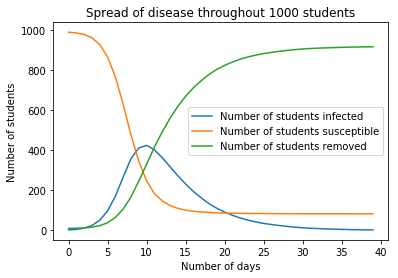

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def ProcessDisease(nums, fract, recovr, num_infect, numd, reps):
    np.random.seed(5)
    data = []   
    sdata = []
    data = np.zeros(numd)                #array for infected 
    sdata = np.zeros(numd)               #array for susceptible     
    rdata = np.zeros(numd) 

    remov = 0                            #number removed

    for k in range(reps) :                   #loop for repeat calc

        #0=immune 1=suscep 2=infected
        P = np.zeros(nums)                #student array to zero
        for i in range(nums) :            #choose susceptibles
            P[i] = 1                      #all susceptible
        fn = int(fract*nums)              #fn = amount initially immune
        n = 0
        while n < fn :                    #while the amount initialliy immune is more than zero exact frac * nums immune
            r1 = np.random.randint(1, nums)   #random number in students
            if P[r1] != 0 :         #find random person in array P then change them to immune?
                P[r1] = 0
                n = n+1                     #turn everyone in fract immune
        m = 0
        while m < 1 :                                   #patient zero
            r2 = np.random.randint(1, nums)
            if P[r2] == 1 :
                P[r2] = 2
                m = 1
                
        # main part of calculation follows
        for j in range(numd) : #loop over days
            for i in range(nums) : #loop over students
                if P[i] == 2 : #spread infection
                    for ii in range(num_infect) : #for everyone who is infected
                        r3 = np.random.randint(1, nums)    #infect new student
                        if P[r3] == 1 :
                            P[r3] = 2
                            remov = remov + 1      #number removed
                if np.random.random_sample() < recovr :     #chance of recovery
                    r4 = np.random.randint(1, nums)
                    if P[r4] == 2 :    #make immune if r4 < chance of recovery
                        P[r4] = 0

            c = 0
            s = 0
            r = 0
            for i in range(nums):       #find no. infected
                if P[i] == 2:           #creat arrays for infected, sus, and immune
                    c = c+1
                if P[i] == 1:
                    s = s+1
                if P[i] == 0:
                    r = r+1
            data[j] = data[j] + c       #add to above arrays
            sdata[j] = sdata[j] + s
            rdata[j] = rdata[j] + r
        num_fected = int(remov*1.0/reps) #calculate number of infected


    plt.plot(data/40, label = 'Number of students infected')
    plt.plot(sdata/40, label = 'Number of students susceptible')
    plt.plot(nums-(data/reps)-(sdata/reps), label = 'Number of students removed')
    plt.title('Spread of disease throughout 1000 students')
    plt.xlabel('Number of days')
    plt.ylabel('Number of students')
    plt.legend()
    plt.show()

ProcessDisease(nums = 1000, fract = 0.01, recovr = 0.2, num_infect = 1, numd = 40, reps = 40)

### (ii) Is there anything somehow incorrect about the code?

#### There are many differences between the code and the outbreak of disease in real life. One such difference is that the code assumes that all people interact with all others in the sample interact every day. This may not be the case in reality as some people will isolate themselves themselves once they have acquired a disease, thereby reducing the propagation of the disease.

## Task 3

### Outbreak with fraction of immune students = 10%

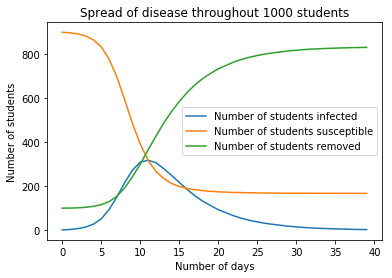

In [2]:
ProcessDisease(nums = 1000, fract = 0.10, recovr = 0.2, num_infect = 1, numd = 40, reps = 40)

### Outbreak with fraction of immune students = 0.1%

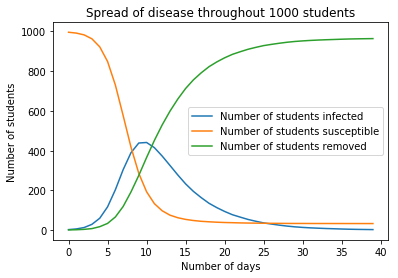

In [3]:
ProcessDisease(nums = 1000, fract = 0.001, recovr = 0.2, num_infect = 1, numd = 40, reps = 40)

### Outbreak with reduced chance of recovery = 5%

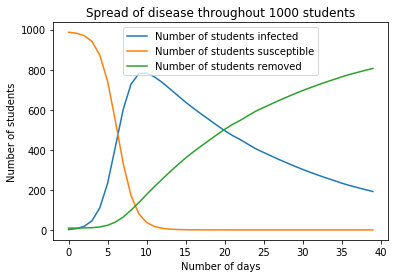

In [4]:
ProcessDisease(nums = 1000, fract = 0.01, recovr = 0.05, num_infect = 1, numd = 40, reps = 40)

### Outbreak with increased chance of recovery = 50%

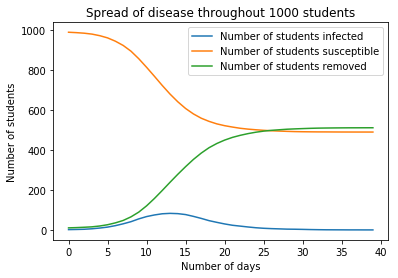

In [5]:
ProcessDisease(nums = 1000, fract = 0.01, recovr = 0.5, num_infect = 1, numd = 40, reps = 40)

##### As we can see above, the effects are as follows:
1. More immunised students slows the outbreak down, but the epidemic lasts for the longer. Decreasing the amount of immunised students has the opposite effect. 
2. Reducing the chance of recovery greatly increases the total number of infected students, propagating much faster and causing a longer epidemic. Again, decreasing the chance of recovery does the oppposite - shorter epidemic with slower propagation.

##### General Rules:
1. More immunised students (ie larger R_0) decreases dI/dt (hence either decreasing k_2 or and increasing k_1) 
2. Reduced chance of recovery increases dI/dt


## Task 4 - Cold and flu

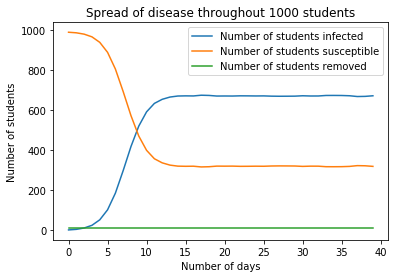

In [20]:
np.random.seed(5)
nums = 1000     #noumber of students
fract = 0.01    #fraction initially immune
recovr = 0.2    #chance of recovering per day
num_infect = 1  #number of infected per day
numd = 40       #number of days
reps = 40       #number of repetitions
data = []   
sdata = []
data = np.zeros(numd)                #array for infected 
sdata = np.zeros(numd)               #array for susceptible ##     
rdata = np.zeros(numd)

remov = 0                            #number removed

for k in range(reps) :                   #loop for repeat calc
    
    # 0=immune 1= suscep 2= infcted
    P = np.zeros(nums)                #student array to zero
    for i in range(nums) :            #choose susceptibles
        P[i] = 1                         #all susceptible
    fn = int(fract*nums)              #fn = amount initially immune
    n = 0
    while n < fn :                    #while the amount initialliy immune is more than zero exact frac * nums immune
        r1 = np.random.randint(1, nums)   #random number in students              
        if P[r1] != 0 :         #find random person in array P then change them to immune?
            P[r1] = 0
            n = n+1                     #turn everyone in fract immune
    m = 0
    while m < 1 :                                   #patie zero?
        r2 = np.random.randint(1, nums)
        if P[r2] == 1 :
            P[r2] = 2
            m = 1

    
    # main part of calculation follows
    for j in range(numd) : #loop over days
        for i in range(nums) : #loop over students
            if P[i] == 2 : #spread infection
                for ii in range(num_infect) : #for everyone who is infected
                    r3 = np.random.randint(1, nums)      #infect new student
                    if P[r3] == 1 :
                        P[r3] = 2
                        remov = remov + 1      #number removed
            if np.random.random_sample() < recovr :     #chance of recovery
                r4 = np.random.randint(1, nums)
                if P[r4] == 2 :
                    P[r4] = 1
        
        c = 0
        s = 0
        r = 0
        for i in range(nums):       #find no. infected
            if P[i] == 2:
                c = c+1
            if P[i] == 1:
                s = s+1
        data[j] = data[j] + c
        sdata[j] = sdata[j] + s
    num_fected = int(remov*1.0/reps)


plt.plot(data/40, label = 'Number of students infected')
plt.plot(sdata/40, label = 'Number of students susceptible')
plt.plot(nums-(data/40)-(sdata/40), label = 'Number of students removed')
plt.title('Spread of disease throughout 1000 students')
plt.xlabel('Number of days')
plt.ylabel('Number of students')
plt.legend()
plt.show()

The above code causes the disease to propagate about as quickly as it did previously, however, this time the amount of infected people does not drop back to zero but fluctuates around approx. 700. This means the epidemic effectively lasts forever, with students swapping back and forth between susceptible and infected which is comparable to the spread of the cold in real life. Nobody becomes entirely removed (aside from those already immune) and the total number of affected rises continuously.

## Self-assessment
1.	I have described how the code is structured and have indicated the main loops 1/1
2.	I have translated the code to python, plotted the graph and justified my suggestion as to how it is incorrect 3/3
3.	I have shown the plots for different scenarios and given general rules 2/2
4.	I have implemented the code with the suggested difference, shown a plot for it and described the effects on disease propagation 1/1
5.	Presentation of code and plots is tidy, with relevant headings and comments 2/2
6.	My use of functions allows for the plots in task 3 to be shown concisely without the need to repeat the code and I have included a legend on all of my plots 1/1


Total: 10/10
